In [1]:
import numpy
import math

In [2]:
aa = 3+2j

In [3]:
type(aa)

complex

In [4]:
(2.75+3.69j)*(8.55-6.13j)

(46.1322+14.692000000000004j)

In [5]:
1.4*numpy.exp(5.32j)

(0.79927078585823497-1.1494199453957457j)

In [6]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

In [7]:
x = numpy.linspace(-5,5,0.1)
y = numpy.linspace(-5,5,0.1)
X,Y = numpy.meshgrid(x,y)

In [8]:
def j_trans(z,c):
    j_trans = z + c**2/z
    return j_trans

In [9]:
from matplotlib import pyplot
%matplotlib inline

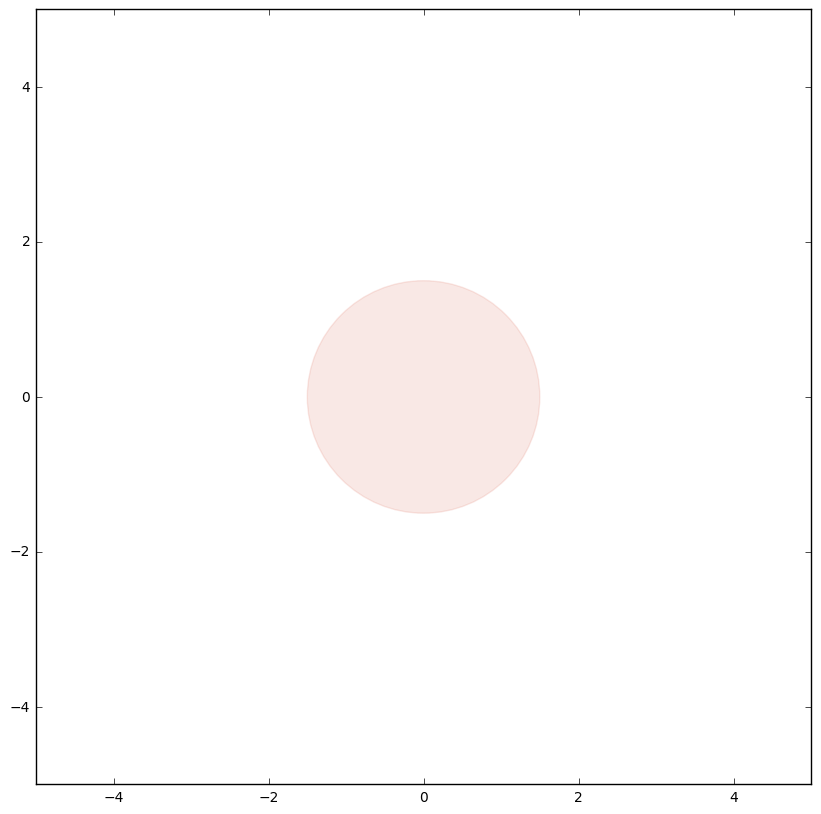

In [10]:
pyplot.figure(figsize=(10,10))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)


circle = pyplot.Circle((0, 0), radius=1.5, color='#CD2305', alpha=0.1)
pyplot.gca().add_patch(circle)

In [15]:
theta = numpy.linspace(0,2*math.pi,1000)
R = 1.5
x_circle = R*numpy.cos(theta)
y_circle = R*numpy.sin(theta)

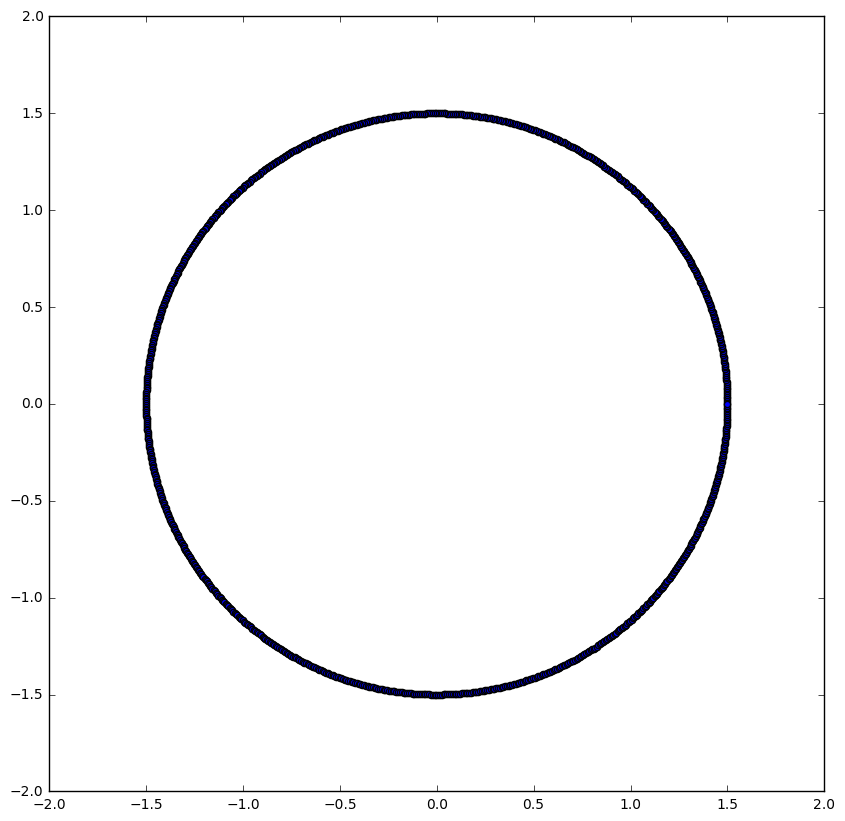

In [16]:
pyplot.figure(figsize=(10,10))
pyplot.scatter(x_circle,y_circle)

In [23]:
z = x_circle[0] +y_circle[0]j

SyntaxError: invalid syntax (<ipython-input-23-22a7cd298f80>, line 1)

In [27]:
j=1j

In [33]:
z_circle = numpy.zeros_like(x_circle)
for i in range (x_circle.shape[0]):
    z_circle[i] = x_circle[i] + y_circle[i]*j

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [41]:
z_circle[0] = 1+5j

TypeError: can't convert complex to float

In [36]:
jj = j_trans(z_circle,1)

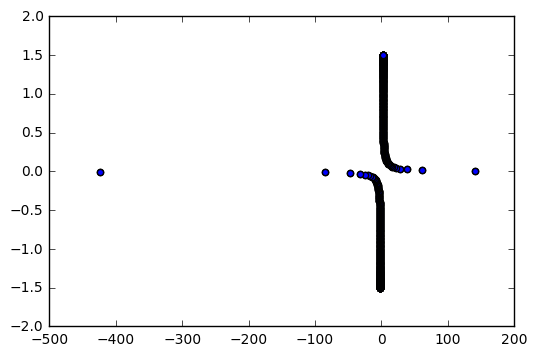

In [38]:
pyplot.scatter(jj,x_circle)